## Dependencies and starter code

In [41]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)
mouse_metadata.head()
study_results.head()

# Combine the data into a single dataset
merged_data = pd.merge(study_results, mouse_metadata, how='left', on=('Mouse ID'))
merged_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


## Summary statistics

In [42]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_stats_group = merged_data.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean', 'median', 'var', 'std', 'sem']})
drug_stats_group


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar plots

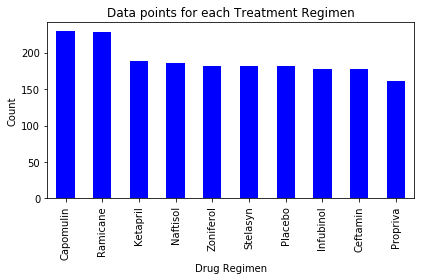

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     161
Name: Drug Regimen, dtype: int64

In [43]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas 
drug_group =merged_data['Drug Regimen'].value_counts()

#drug_group_count_data = pd.DataFrame(drug_group['Drug Regimen'].count())

count_data_chart = drug_group.plot(kind='bar', title="Data points for each Treatment Regimen", color="blue")

count_data_chart.set_xlabel("Drug Regimen")
count_data_chart.set_ylabel("Count")
plt.tight_layout()

plt.show()

drug_group

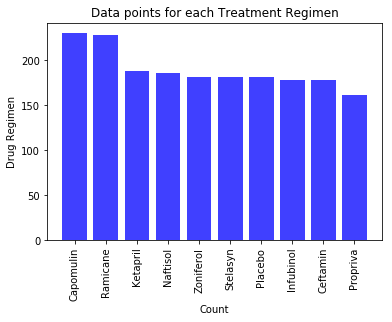

In [44]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

x_axis =drug_group.index.values
y_axis =drug_group.values


plt.title("Data points for each Treatment Regimen")
plt.xlabel("Count")
plt.ylabel("Drug Regimen")


plt.bar(x_axis, y_axis, facecolor="blue", alpha=0.75, align="center")
plt.xticks(rotation=90)
plt.show()



## Pie plots

In [45]:
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
5,s508,Ramicane,Male,1,17
6,f966,Capomulin,Male,16,17
7,m546,Ramicane,Male,18,16
8,z578,Ramicane,Male,11,16
9,j913,Ramicane,Female,4,17


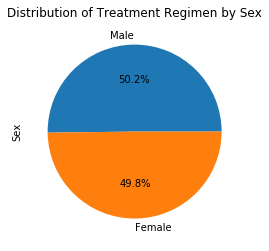

In [46]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex=mouse_metadata['Sex'].value_counts()
sex.plot(kind='pie', title="Distribution of Treatment Regimen by Sex", autopct='%1.1f%%')
plt.show()

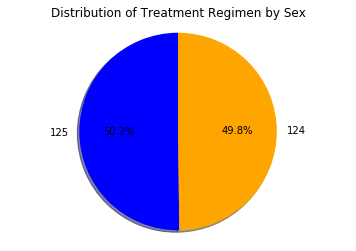

In [47]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
sizes = [50.2, 49.8]
colors = ["blue", "orange"]

plt.title("Distribution of Treatment Regimen by Sex")

plt.pie(sizes, labels=sex, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)

plt.axis("equal")
plt.show()


## Quartiles, outliers and boxplots

In [48]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

#determine the max tumor volume grouped by ['Mouse ID']
max_tumor=merged_data.groupby(['Mouse ID']).max().reset_index()

max_tumor

#merge max tumor data with original merged data to get tumor volume at last timepoint
tumor_vol_merged_data=max_tumor [['Mouse ID','Timepoint']].merge(merged_data, on=['Mouse ID', 'Timepoint'], how='left')

Capomulin=tumor_vol_merged_data.loc[tumor_vol_merged_data["Drug Regimen"]== 'Capomulin']['Tumor Volume (mm3)']
Ramicane=tumor_vol_merged_data.loc[tumor_vol_merged_data["Drug Regimen"]== 'Ramicane']['Tumor Volume (mm3)']
Infubinol=tumor_vol_merged_data.loc[tumor_vol_merged_data["Drug Regimen"]== 'Infubinol']['Tumor Volume (mm3)']
Ceftamin=tumor_vol_merged_data.loc[tumor_vol_merged_data["Drug Regimen"]== 'Ceftamin']['Tumor Volume (mm3)']

#calculate quartiles and IQR for capomulin, ramicane, infubinol, and ceftamin 
i_lower_q_capomulin=Capomulin.quantile([.25,.5,.75])[.25]
i_upper_q_capomulin=Capomulin.quantile([.25,.5,.75])[.75]
i_iqr_capomulin=i_upper_q_capomulin - i_lower_q_capomulin

i_lower_q_ramicane=Ramicane.quantile([.25,.5,.75])[.25]
i_upper_q_ramicane=Ramicane.quantile([.25,.5,.75])[.75]
i_iqr_ramicane=i_upper_q_ramicane - i_lower_q_ramicane

i_lower_q_infubinol=Infubinol.quantile([.25,.5,.75])[.25]
i_upper_q_infubinol=Infubinol.quantile([.25,.5,.75])[.75]
i_iqr_infubinol=i_upper_q_infubinol - i_lower_q_infubinol

i_lower_q_ceftamin=Ceftamin.quantile([.25,.5,.75])[.25]
i_upper_q_ceftamin=Ceftamin.quantile([.25,.5,.75])[.75]
i_iqr_ceftamin=i_upper_q_ceftamin - i_lower_q_ceftamin

#calculate upper and lower bounds for capomulin, ramicane, infubinol, and ceftamin
i_lower_bound_capomulin=i_lower_q_capomulin-(1.5*i_iqr_capomulin)
i_upper_bound_capomulin=i_upper_q_capomulin+(1.5*i_iqr_capomulin)

i_lower_bound_ramicane=i_lower_q_ramicane-(1.5*i_iqr_ramicane)
i_upper_bound_ramicane=i_upper_q_ramicane+(1.5*i_iqr_ramicane)

i_lower_bound_infubinol=i_lower_q_infubinol-(1.5*i_iqr_infubinol)
i_upper_bound_infubinol=i_upper_q_infubinol+(1.5*i_iqr_infubinol)

i_lower_bound_ceftamin=i_lower_q_ceftamin-(1.5*i_iqr_ceftamin)
i_upper_bound_ceftamin=i_upper_q_ceftamin+(1.5*i_iqr_ceftamin)

#calculate outliers for capomulin, ramicane, infubinol, and ceftamin
i_outliers_capomulin=Capomulin.loc[(Capomulin<i_lower_bound_capomulin)|(Capomulin>i_upper_bound_capomulin)]
i_outliers_ramicane=Ramicane.loc[(Ramicane<i_lower_bound_ramicane)|(Ramicane>i_upper_bound_ramicane)]
i_outliers_infubinol=Infubinol.loc[(Infubinol<i_lower_bound_infubinol)|(Infubinol>i_upper_bound_infubinol)]
i_outliers_ceftamin=Ceftamin.loc[(Ceftamin<i_lower_bound_ceftamin)|(Ceftamin>i_upper_bound_ceftamin)]

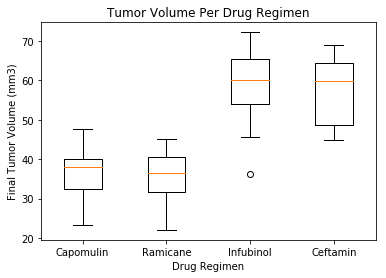

In [49]:
# Generate a box plot of the final tumor volume of each mouse across four drug regimens 
box_plot = [Capomulin, Ramicane, Infubinol, Ceftamin]

fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume Per Drug Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')

ax1.boxplot(box_plot, labels=["Capomulin","Ramicane","Infubinol","Ceftamin",])

plt.savefig('boxplot')
plt.show()

## Line and scatter plots

In [80]:
Capomulin_df = merged_data.loc[merged_data ["Drug Regimen"] == "Capomulin"]
Capomulin_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
226,j246,0,45.0,0,Capomulin,Female,21,21
227,r554,0,45.0,0,Capomulin,Female,8,17
228,s185,0,45.0,0,Capomulin,Female,3,17
229,b742,0,45.0,0,Capomulin,Male,7,21


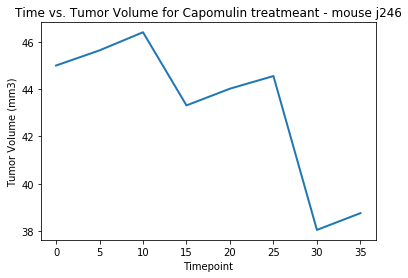

In [81]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
Capomulin_df=Capomulin_df.loc[Capomulin_df["Mouse ID"]=="j246"]

x_axisTP = Capomulin_df["Timepoint"]
tum_vol = Capomulin_df["Tumor Volume (mm3)"]

plt.title('Time vs. Tumor Volume for Capomulin treatmeant - mouse j246')
plt.plot(x_axisTP, tum_vol,linewidth=2, markersize=12)
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.savefig('linechart')
plt.show()

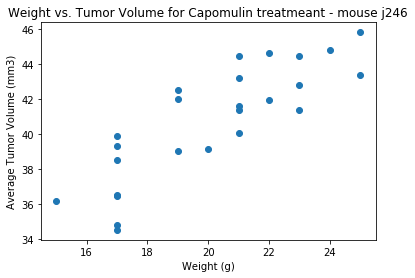

In [82]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
Capomulin_df = merged_data.loc[merged_data ["Drug Regimen"] == "Capomulin"]
Capomulin_df.head()

capavg=Capomulin_df.groupby("Mouse ID").mean()

plt.title('Weight vs. Tumor Volume for Capomulin treatmeant - mouse j246')
plt.scatter(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.savefig('scatterplot')
plt.show()

The correlation between mouse weight and average tumor volume is 0.84


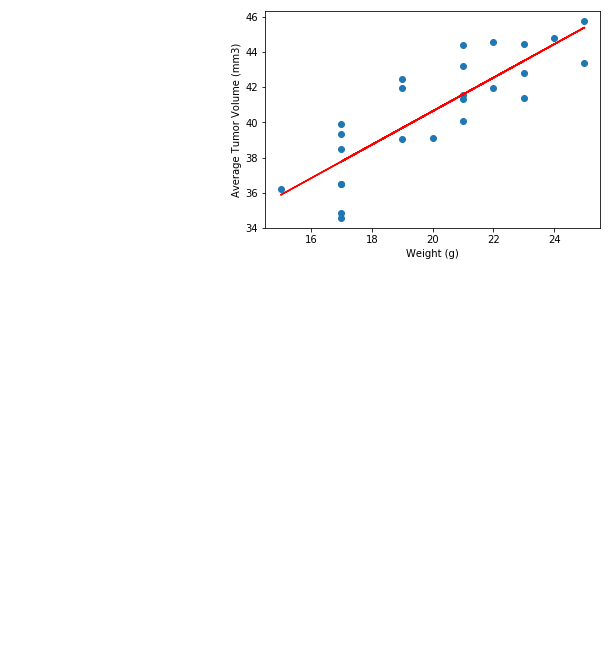

In [83]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
correlation= round(st.pearsonr(x_values, y_values)[0],2)
print(f"The correlation between mouse weight and average tumor volume is {correlation}")
x_values = capavg['Weight (g)']
y_values = capavg['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()